A [bubble plot](http://python-graph-gallery.com/bubble-plot/) is a [scatterplot](http://python-graph-gallery.com/scatter-plot/) with a third dimension: the **size** of the markers. It is even possible to add a fourth dimension using **colors**. It can be done using the `cmap` argument of the `scatter()` function of [matplotlib](http://python-graph-gallery.com/matplotlib/).


## Libraries & Dataset

We will start by importing the necessary libraries and loading the dataset.

Since [bubble plots](/bubble-plot) requires **numerical values**, we need to have quantitative data in our dataset.


In [2]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create data
df = pd.DataFrame({
      'x': np.random.rand(40),
      'y': np.random.rand(40),
      'z': np.random.rand(40),
      'cat': np.random.choice(['A', 'B', 'C'], 40)
   })
df.head()

,x,y,z,cat
0,0.581679,0.239945,0.266493,A
1,0.776207,0.734859,0.788658,B
2,0.672333,0.055408,0.865137,C
3,0.151227,0.820374,0.186279,A
4,0.517176,0.403605,0.312726,A


## Map with numerical values

First, we initiate a simple bubble plot using the `scatter()` function from [matplotlib](/matplotlib). By incorporating the `cmap` argument, we introduce a **fourth dimension** to our plot.

Here, the `y` variable dictates the **color of the markers**—observed as progressively darker hues as values ascend on the y-axis.


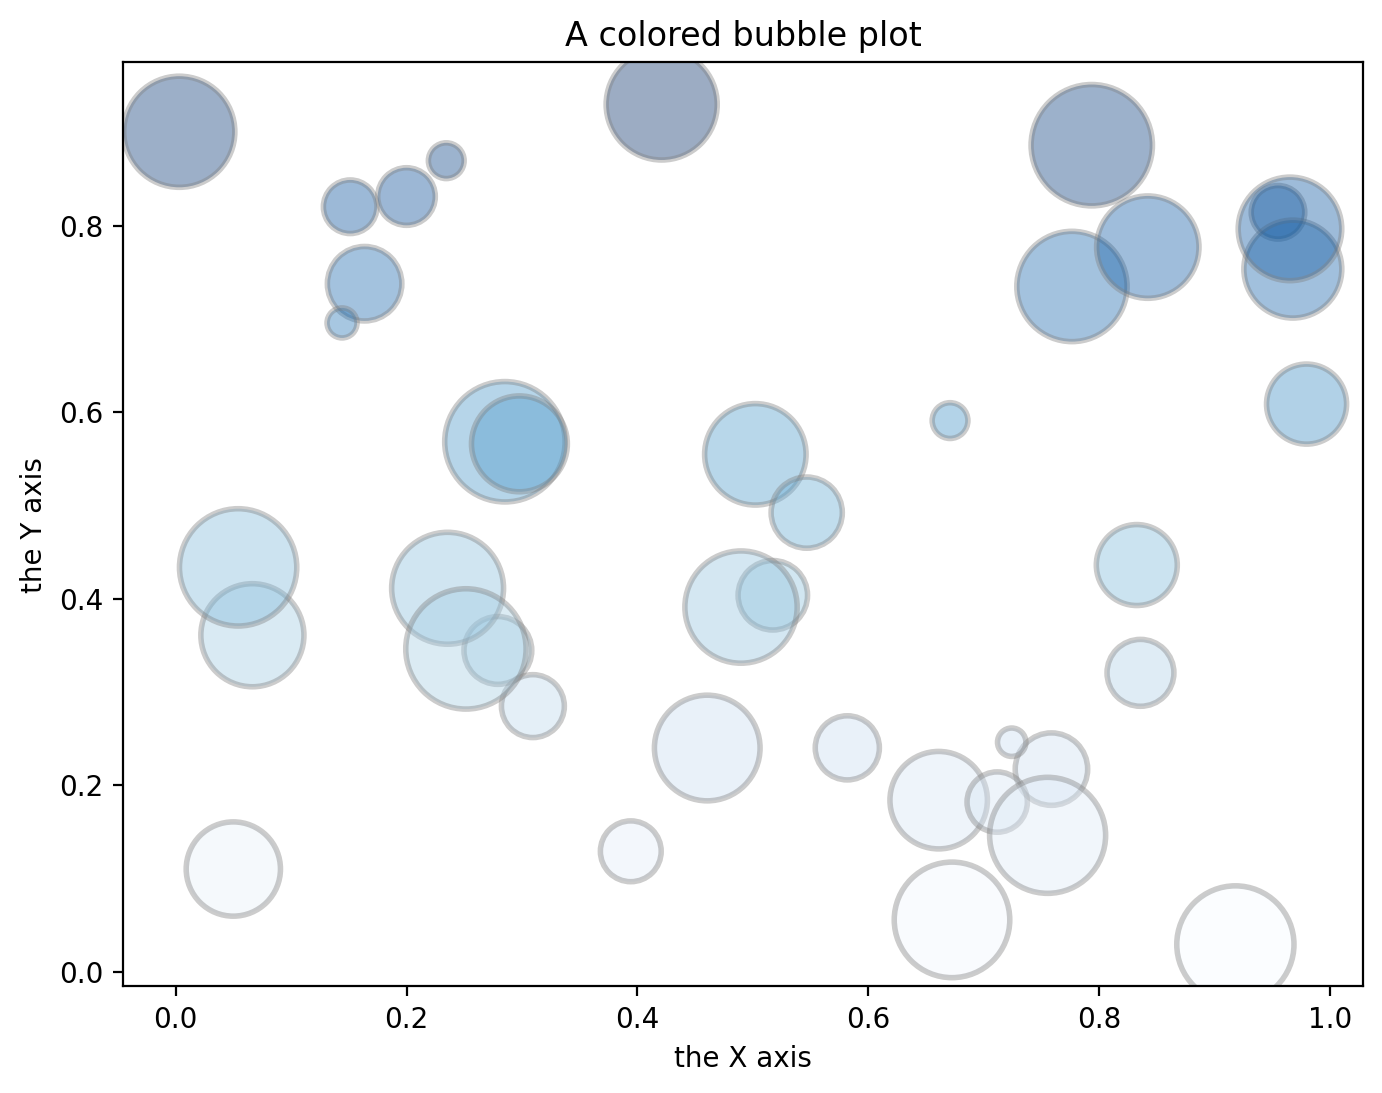

In [12]:
# Initiate the chart
fig, ax = plt.subplots(figsize=(8,6), dpi=200)

# We map the color to the X axis value.
ax.scatter(
   x=df['x'],
   y=df['y'],
   s=df['z']*2000,
   c=df['y'],
   cmap="Blues",
   alpha=0.4,
   edgecolors="grey",
   linewidth=2
)

# Add titles (main and on axis)
ax.set_xlabel("the X axis")
ax.set_ylabel("the Y axis")
ax.set_title("A colored bubble plot")

# Show the graph
plt.show()

## Map with categorical values with cmap

To create a bubble plot with categorical color mapping and a legend in Matplotlib:

1. **Encode Categories**: Convert category names into numerical codes using `pd.factorize`.

2. **Initialize Chart**: Set up the plotting area using `fig, ax = plt.subplots`.

3. **Create Bubble Plot**: Plot the data points using `ax.scatter`. The `x` and `y` parameters determine the position of the bubbles, `s` controls their size, and `c` sets their color based on category codes. `cmap` defines the color map, and `alpha` sets the transparency.

4. **Add Legend**:

   - Import `Patch` from `matplotlib.patches`.
   - Create legend handles by iterating over the unique category names and their corresponding codes. Each handle is a `Patch` object with the color from the scatter plot's colormap.
   - Add the legend to the plot with `ax.legend`, setting the handles, title, and location.

5. **Customize Axes and Display**: Label the axes and title, then show the plot with `plt.show()`.


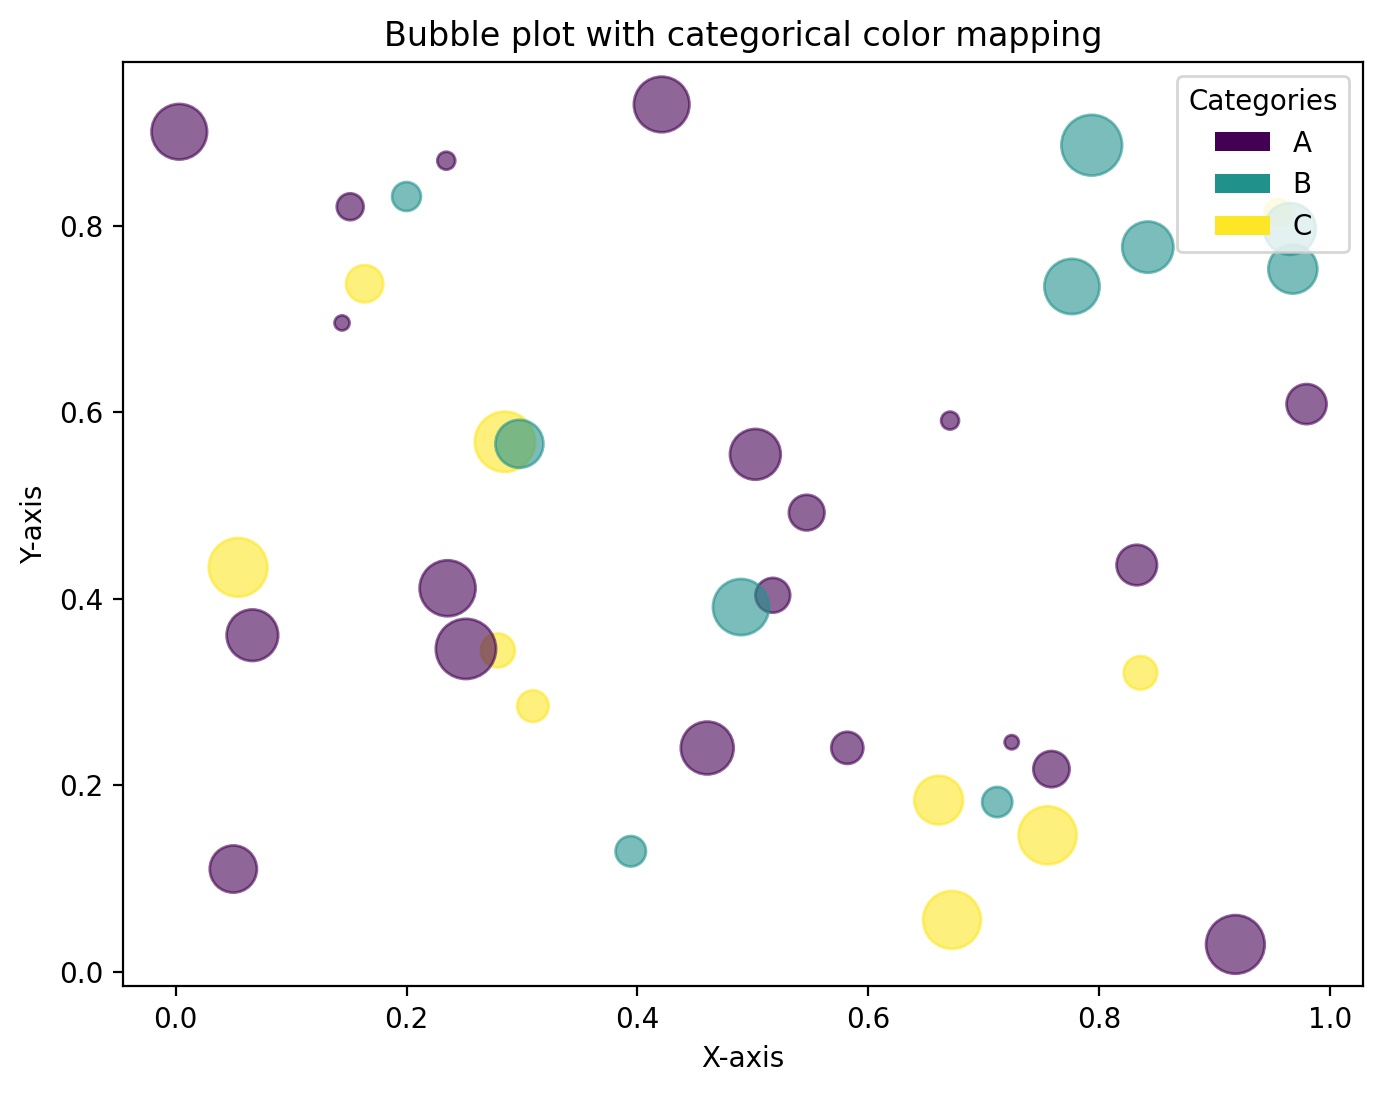

In [25]:
# Encode the categories as integers
category_codes, category_names = pd.factorize(df['cat'])

# Initiate the chart
fig, ax = plt.subplots(figsize=(8,6), dpi=200)

# Create the bubble plot
scatter = ax.scatter(
   x=df['x'],
   y=df['y'],
   s=df['z']*500,
   c=category_codes,
   cmap='viridis',
   alpha=0.6
)

# Legend
from matplotlib.patches import Patch
handles = [Patch(facecolor=scatter.cmap(scatter.norm(i)), label=label)
           for i, label in enumerate(category_names)]
ax.legend(handles=handles, title='Categories', loc='upper right')

# Custom axes and display chart
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Bubble plot with categorical color mapping')
plt.show()

## Map with categorical values with specific colors

If you want to use **your own colors** for the categories, you can create a dictionary that maps category names to colors. Then, you can pass the colors to the `c` parameter of the `scatter()` function.

However, there is no know method for avoiding the `for` loop when creating the [scatter plot](/scatter-plot).


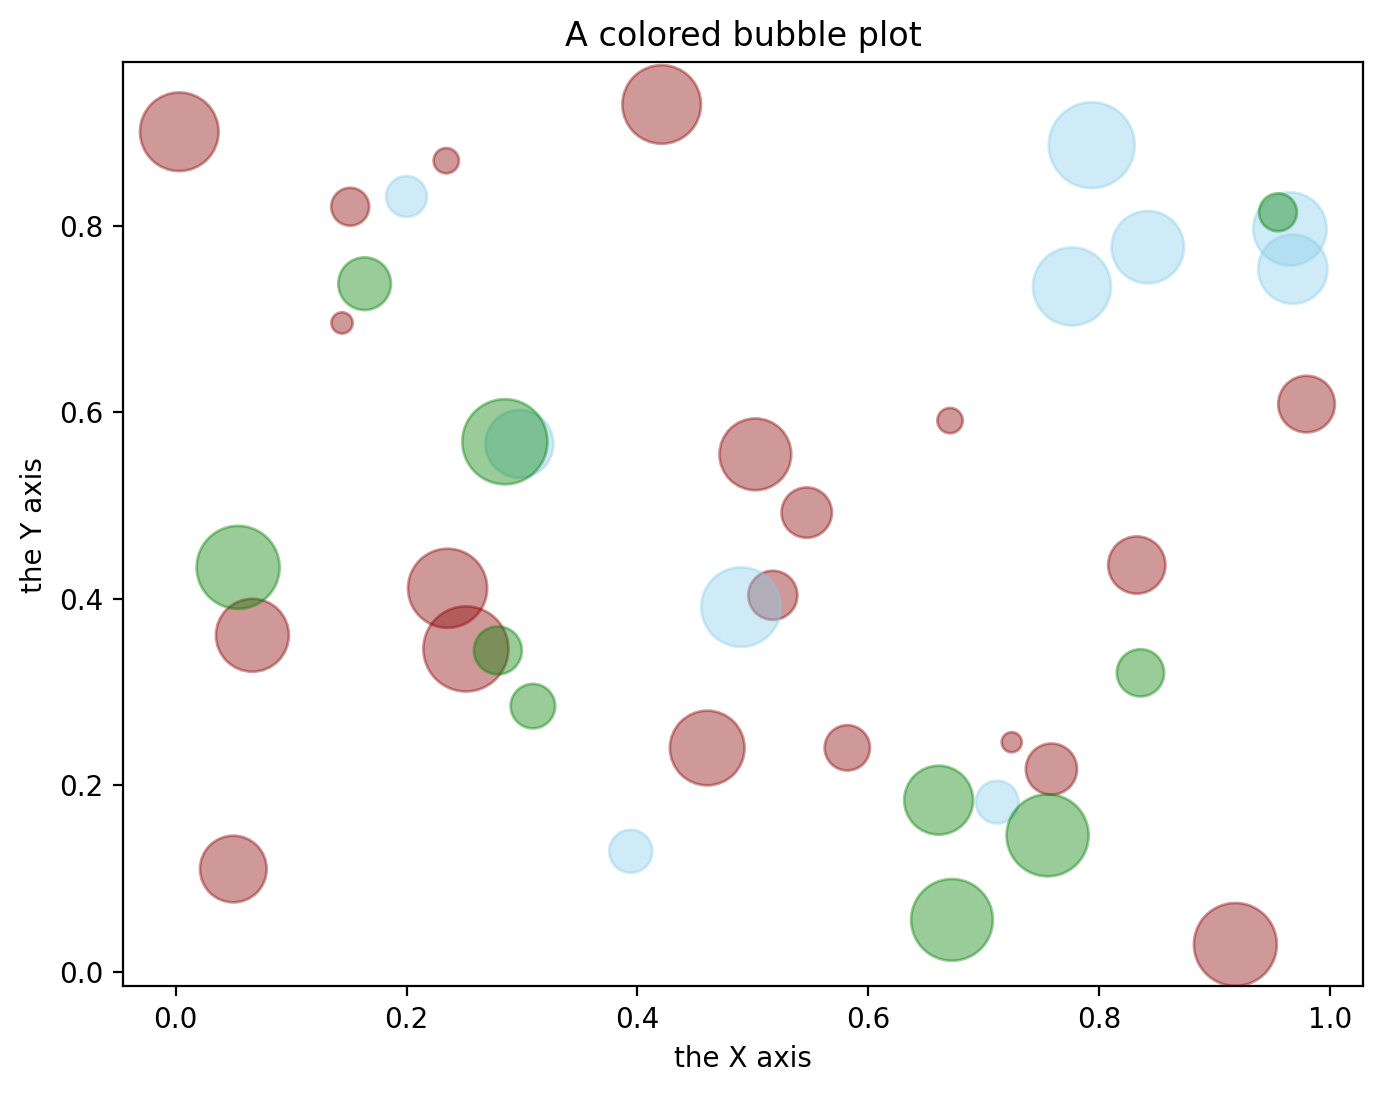

In [26]:
# Initiate the chart
fig, ax = plt.subplots(figsize=(8,6), dpi=200)

# Define color mapping
colors = {'A':'darkred', 'B':'skyblue', 'C':'green'}

# Iterate over each group value
for group, color in colors.items():
    ax.scatter(
        x=df['x'][df['cat']==group],
        y=df['y'][df['cat']==group],
        s=df['z'][df['cat']==group]*1000,
        c=color,
        alpha=0.4
    )

# Add titles (main and on axis)
ax.set_xlabel("the X axis")
ax.set_ylabel("the Y axis")
plt.title("A colored bubble plot")

# Show the graph
plt.show()

## Going further

You might be interested in:

- how to change [colors, shape and size](/271-custom-your-bubble-plot) of the bubbles
- how to create a [beautiful bubble plot](/web-bubble-plot-with-annotations-and-custom-features) in python
